<a href="https://colab.research.google.com/github/IvanIndargo/Datamining_exersice/blob/main/%5BQuestion%5D_Exercise_Week_3_Pandas_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Week 3**

**DATASET** <br>
https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv <br>



**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [1]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt

1. display 5 columns from dataset

In [2]:
#1
dataset = "https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv"
df = pd.read_csv(dataset)
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


2. display the info column and conclude what the insight is from that column

In [3]:
#2
df.info()

#conclusion
# dengan menampilkan info dari kolom maka kita dapat lebih mudah untuk melihat tentang detail dari dataset,
# seperti nama kolom, jumlah kolom, jumlah data atau baris, dan tipe data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


3. display the number of each unique value in the race and admission columns (including NaN)

In [4]:
#3a
admission_unique = df['admission'].value_counts(dropna=False)
print(admission_unique)

admission
NaN         5194
Admit        900
Waitlist     100
Name: count, dtype: int64


In [5]:
#3b
race_unique = df['race'].value_counts(dropna=False)
print(race_unique)

race
NaN         1842
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: count, dtype: int64


4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [6]:
#4
df['admission'].fillna('deny', inplace=True)
df['race'].fillna('Other', inplace=True)
print(df)

      application_id  gender  international   gpa       major      race  \
0                  1  Female          False  3.30    Business     Asian   
1                  2    Male          False  3.28  Humanities     Black   
2                  3  Female           True  3.30    Business     Other   
3                  4    Male          False  3.47        STEM     Black   
4                  5    Male          False  3.35        STEM  Hispanic   
...              ...     ...            ...   ...         ...       ...   
6189            6190    Male          False  3.49    Business     White   
6190            6191    Male          False  3.18        STEM     Black   
6191            6192  Female           True  3.22    Business     Other   
6192            6193    Male           True  3.36    Business     Other   
6193            6194    Male          False  3.23        STEM  Hispanic   

       gmat  work_exp          work_industry admission  
0     620.0       3.0     Financial Servic

<ipython-input-6-35da049bbead>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['admission'].fillna('deny', inplace=True)
<ipython-input-6-35da049bbead>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

5. recheck missing value

In [7]:
#5
df.isnull().sum()

,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,0
gmat,0
work_exp,0
work_industry,0
admission,0


6. drop application_id column

In [8]:
# 6
df = df.drop(columns=['application_id'])

7. show describe column and conclude what the insight is from that column

In [9]:
#7
df.describe()

#conclusion
#dengan menampilkan deskripsi dari kolom dataset kita dapat dengan mudah mengetahui
#rata-rata, standar devisiasi, nilai minimal, nilai maksimal, nilai tengah, nilai seperempat, dan nilai tiga perempat
#untuk memudahkan dalam melakukan analisa data dan pemodelan data

,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


8. make a visualization to analyze admission status based on major and explain the conclusions

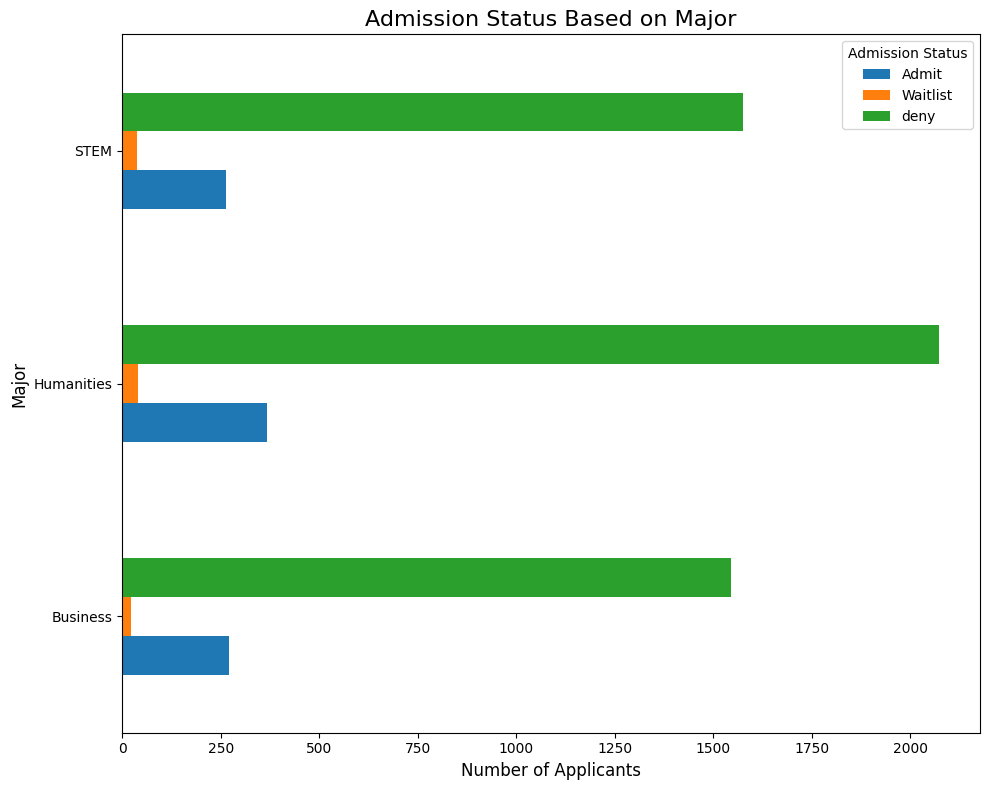

In [10]:
#8
admission_data = df.dropna(subset=['admission'])
admission_by_major = pd.crosstab(admission_data['major'], admission_data['admission'])
admission_by_major.plot(kind='barh', stacked=False, figsize=(10, 8))

plt.title('Admission Status Based on Major', fontsize=16)
plt.xlabel('Number of Applicants', fontsize=12)
plt.ylabel('Major', fontsize=12)
plt.legend(title='Admission Status')

plt.tight_layout()
plt.show()

#dengan memvisualisasikan data menggunakan bar plot seperti ini, kita dapat dengan mudah melihat perbandingan status pendaftar.
#Kita dapat melihat jumlah status pendaftar menjadi lebih jelas dan detail

9. make a visualization to analyze the admissions in each major based on gender and explain the conclusions

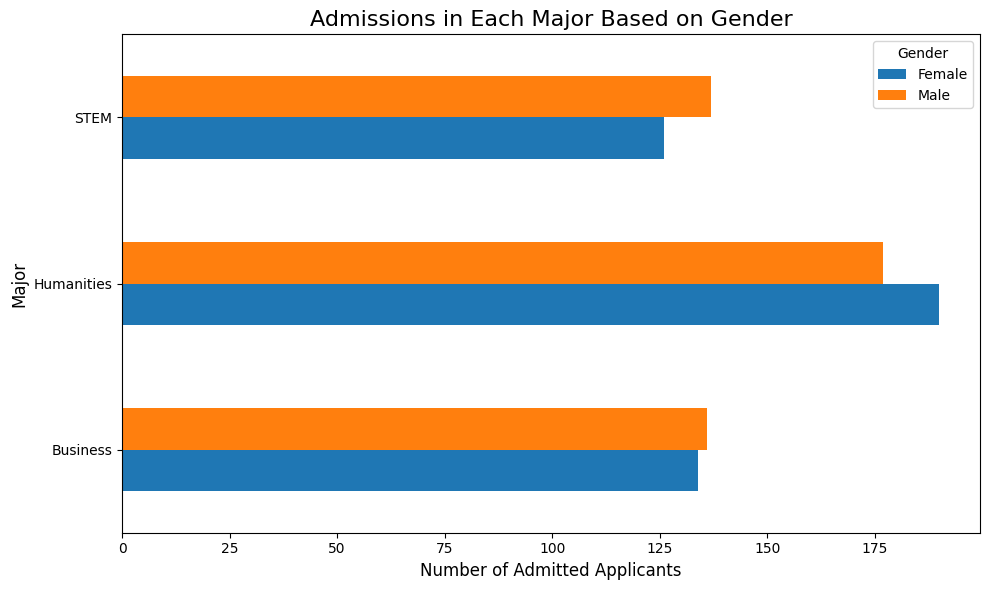

In [11]:
#9
admission_data = df.dropna(subset=['admission'])
admitted_data = admission_data[admission_data['admission'] == 'Admit']
admission_by_major_gender = pd.crosstab(admitted_data['major'], admitted_data['gender'])
if admission_by_major_gender.empty:
    print("The crosstab is empty. Check your data for admissions.")
else:
    admission_by_major_gender.plot(kind='barh', stacked=False, figsize=(10, 6))
    plt.title('Admissions in Each Major Based on Gender', fontsize=16)
    plt.xlabel('Number of Admitted Applicants', fontsize=12)
    plt.ylabel('Major', fontsize=12)
    plt.xticks(rotation=0)
    plt.legend(title='Gender')
    plt.tight_layout()
    plt.show()

#dengan meggunakan visualisasi ini juga memudahkan kita untuk melihat data perbandingan gender pendaftaran.
#kita dapat dengan jelas melihat jumlah gender pendaftar di masing masing jurusan.

10. create your own insightful visualization and explain it in at least 2 sentences

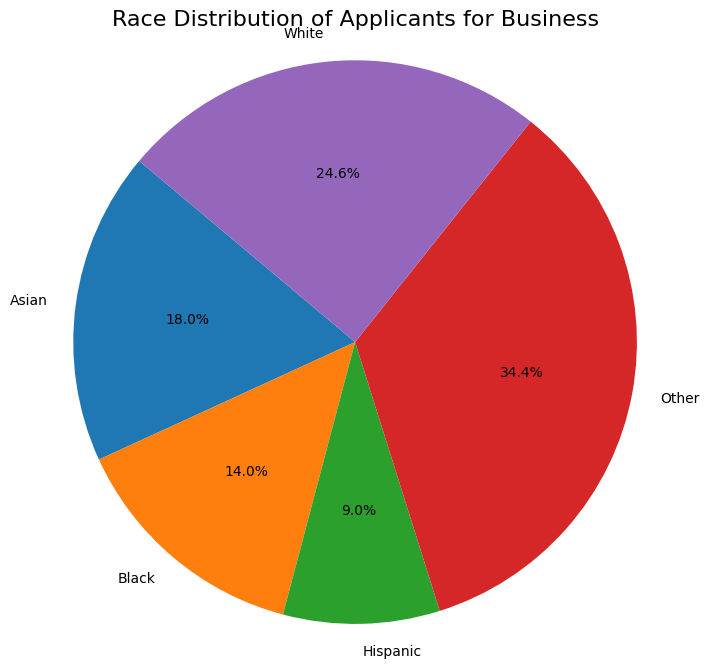

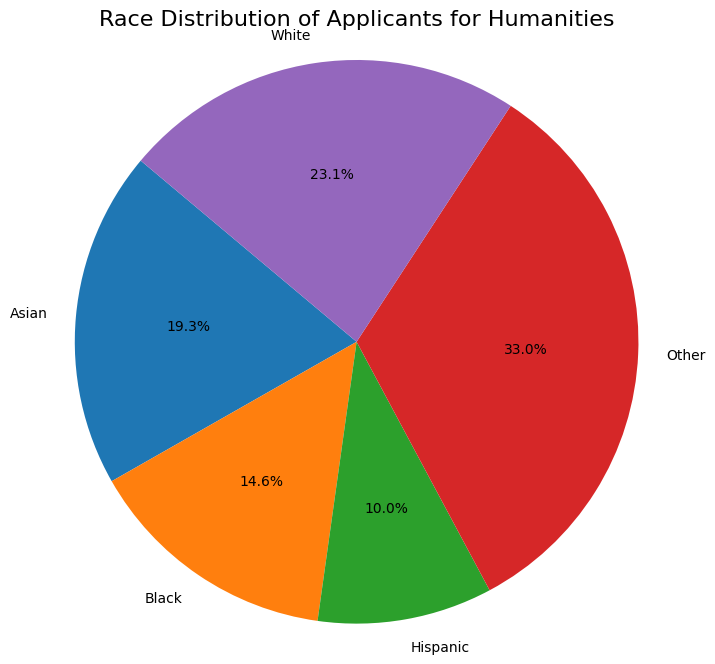

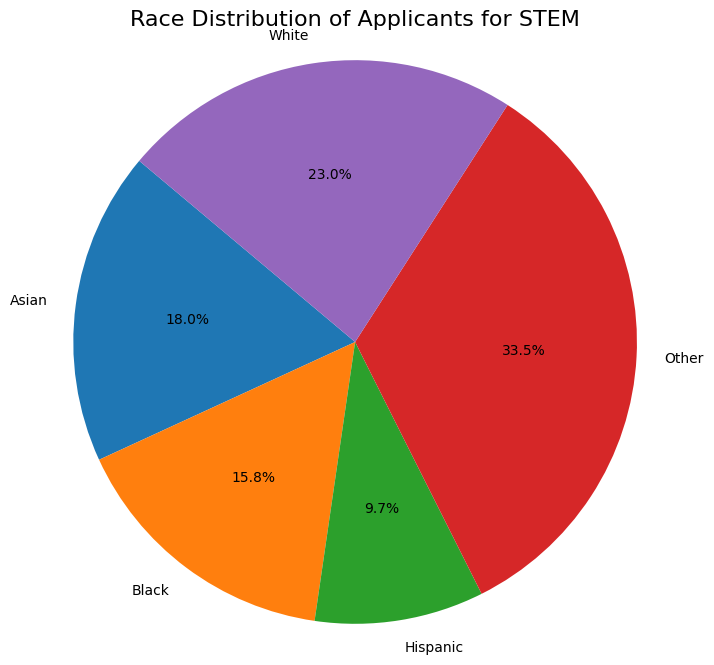

In [12]:
#10
race_by_major = df.groupby(['major', 'race']).size().unstack(fill_value=0)
if race_by_major.empty:
    print("No data available for plotting.")
else:
    for major in race_by_major.index:
        race_counts = race_by_major.loc[major]
        plt.figure(figsize=(8, 8))
        plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=140)
        plt.title(f'Race Distribution of Applicants for {major}', fontsize=16)
        plt.axis('equal')
        plt.show()
#dengan menggunakan pie chart ini juga dapat memudahkan untuk membandingan data yang diinginkan.
#seperti contoh dalam visualisasi ini kita dapat lebih mudah untuk membandingkan race di masing masing jurusannya dalam presentase persen

11. create your own insightful visualization and explain it in at least 2 sentences

<ipython-input-13-91ceb358a7e2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['race'].fillna('Other', inplace=True)


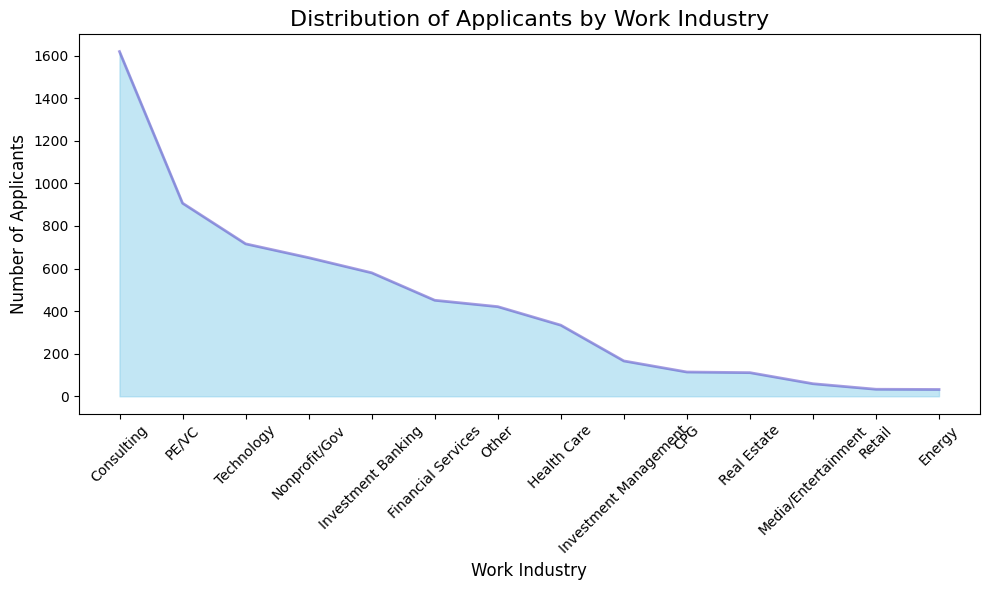

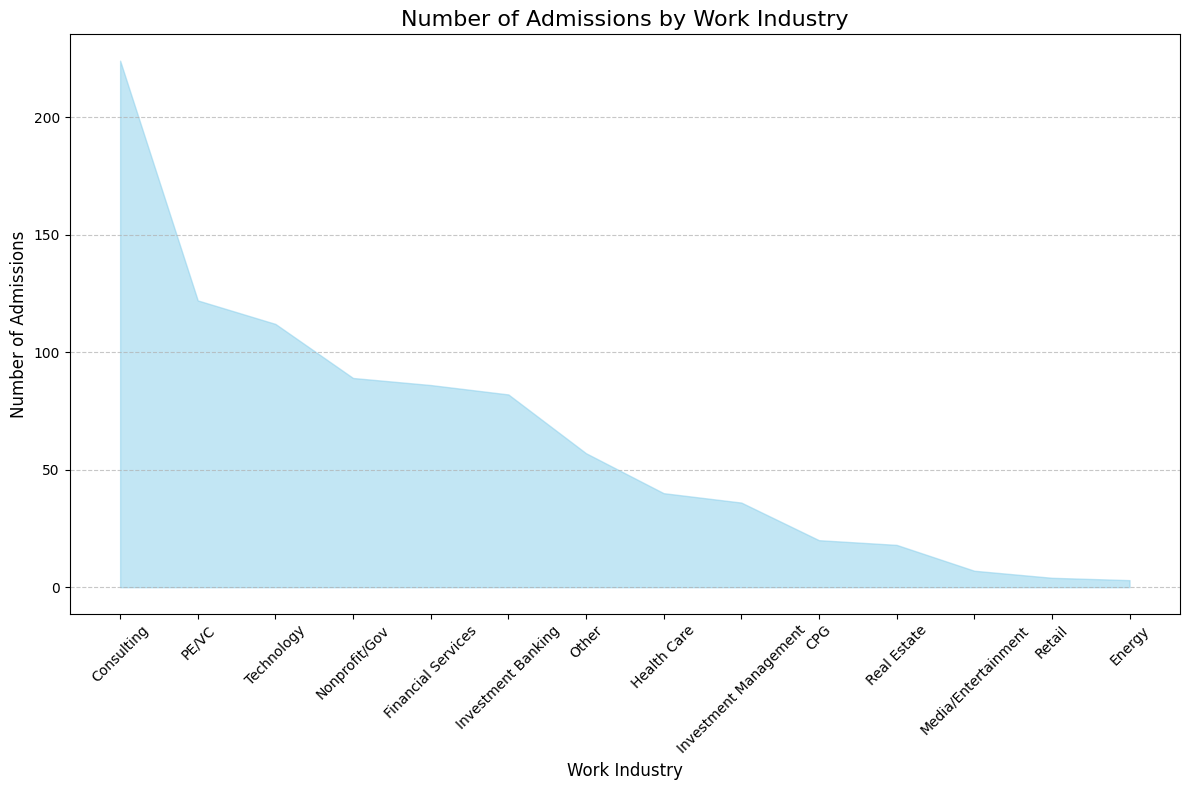

In [13]:
#11
df['race'].fillna('Other', inplace=True)
industry_counts = df['work_industry'].value_counts()
plt.figure(figsize=(10, 6))
plt.fill_between(industry_counts.index, industry_counts.values, color='skyblue', alpha=0.5)
plt.plot(industry_counts.index, industry_counts.values, color='Slateblue', alpha=0.6, linewidth=2)
plt.title('Distribution of Applicants by Work Industry', fontsize=16)
plt.xlabel('Work Industry', fontsize=12)
plt.ylabel('Number of Applicants', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
admission_counts = df[df['admission'] == 'Admit']['work_industry'].value_counts()
plt.fill_between(admission_counts.index, admission_counts.values, color='skyblue', alpha=0.5)
plt.title('Number of Admissions by Work Industry', fontsize=16)
plt.xlabel('Work Industry', fontsize=12)
plt.ylabel('Number of Admissions', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#dengan menggunakan grafik ini kita dapat melihat jumlah perbandingan di masing-masing industry.
#sebagai contoh dalam grafik ini menampilkan jumlah pendaftar dan jumlah diterimanya di masing-masing work industry

12. encode categorical columns and display the results

In [14]:
#12a
from sklearn.preprocessing import LabelEncoder

#encode X

X = df.drop('admission', axis=1)

columns = ['gender', 'international', 'major', 'race', 'work_industry']

label_encoders = {}
for col in columns:
    le = LabelEncoder()
    X[col] = LabelEncoder().fit_transform(X[col])
    label_encoders[col] = le

df[columns] = X[columns]

df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,Admit
1,1,0,3.28,1,1,680.0,5.0,6,deny
2,0,1,3.30,0,3,710.0,5.0,13,Admit
3,1,0,3.47,2,1,690.0,6.0,13,deny
4,1,0,3.35,2,2,590.0,5.0,1,deny


In [15]:
#12b
#encode y
df['admission'] = LabelEncoder().fit_transform(df['admission'])
y = df['admission']

df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,0
1,1,0,3.28,1,1,680.0,5.0,6,2
2,0,1,3.30,0,3,710.0,5.0,13,0
3,1,0,3.47,2,1,690.0,6.0,13,2
4,1,0,3.35,2,2,590.0,5.0,1,2


13. create a heatmap to see the correlation and explain the conclusion

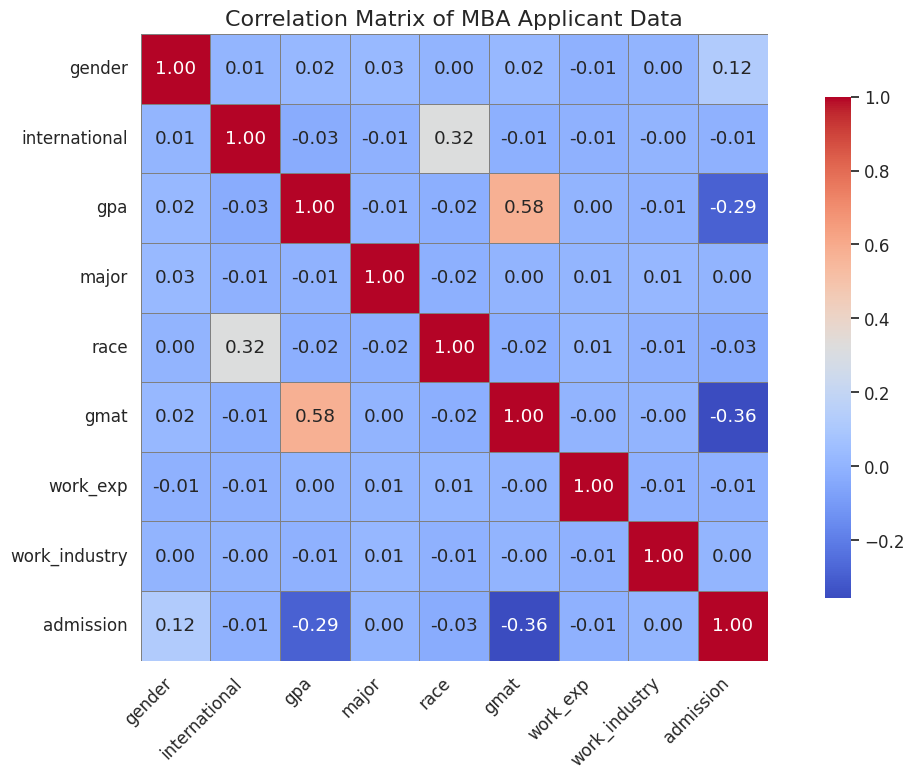

In [17]:
#13
import matplotlib.pyplot as plt
import seaborn as sns

df_encoded = pd.get_dummies(df, drop_first=True)
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.1)
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True,
                       cbar_kws={"shrink": .8}, linewidths=.5, linecolor='gray')
plt.title('Correlation Matrix of MBA Applicant Data', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
#Conclusion
#dengan menggunakan heatmap ini kita dapat melihat secara langsung perbandingan antara kolom satu dengan lainnya.
#dengan heatmap ini dapat melihat korelasi antar kolom apakah korelasi ngatif atau positif

**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [20]:
#Challenge
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
average_gpa = df['gpa'].mean()
lisa = {
    'gender': 0,
    'international': 0,
    'gpa': average_gpa,
    'major': 0,
    'race': 0,
    'gmat': 580.0,
    'work_exp': 2,
    'work_industry': 3
}

X = df[['gender', 'international', 'gpa', 'major', 'race', 'gmat', 'work_exp','work_industry']]
y = df['admission']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

lisa_df = pd.DataFrame([lisa_data])

prediction = model.predict(lisa_df)

result = "diterima" if prediction[0] == 1 else "ditolak"
print(f"Prediction untuk Lisa: {result}")


Accuracy: 0.774818401937046
Prediction untuk Lisa: ditolak
